In [1]:
import plotly.express as px
# ^^^ pyforest auto-imports - don't write above this line
# https://mybinder.org/v2/gh/8080labs/bamboolib_binder_template/master?filepath=bamboolib_demo_titanic.ipynb

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
pd.set_option('display.max_columns',None)
plt.rcParams['figure.figsize'] = (15,8)

In [28]:
np.random.seed(0)

In [12]:
# data = pd.read_csv('https://raw.githubusercontent.com/ranga6897/DataAnalysis/master/RiceFarms/RiceFarms.csv',index_col = 0)
data = pd.read_csv('RiceFarms.csv',index_col = 0)
data.drop(columns = 'id',inplace = True)

In [13]:
data

size status varieties  bimas  seed  urea  phosphate  pesticide  pseed  \
1     3.000  owner     mixed  mixed    90   900         80       6000   80.0   
2     2.000  owner      trad  mixed    40   600          0       3000   70.0   
3     1.000  owner      high  mixed   100   700        150       5000  140.0   
4     2.000  owner      high  mixed    60   600        100       5000   90.0   
5     3.572  share      high     no   105   400        400      10200  350.0   
...     ...    ...       ...    ...   ...   ...        ...        ...    ...   
1022  0.200  owner      trad  mixed     7    70         30          0  100.0   
1023  0.286  owner      trad  mixed     8    85         20        300   70.0   
1024  0.286  owner      trad    yes     8    70         25          0   90.0   
1025  0.786  mixed     mixed    yes    22   158         90          0  150.0   
1026  0.501  mixed      trad    yes    14    93         45          0  170.0   

      purea  pphosph  hiredlabor  famlabor  totlabor    wage  goutput  \
1      75.0     75.0        2875        40      2915   68.49     7980   
2      75.0     75.0        2110        45      2155   60.09     4083   
3      70.0     70.0         980        95      1075   51.99     2650   
4      70.0     70.0        2081        10      2091   56.98     4500   
5      80.0     80.0        3889         1      3889  152.03    16300   
...     ...      ...         ...       ...       ...     ...      ...   
1022   80.0     80.0         130        90       220   53.85      710   
1023   70.0     70.0          90       151       241   57.22      650   
1024   73.0     75.0         170        72       242   59.41      645   
1025   90.0     90.0         630       311       941  152.38     3760   
1026   90.0     90.0         445       261       706  159.66     2750   

      noutput  price         region  
1        6800   60.0  wargabinangun  
2        3500   60.0  wargabinangun  
3        2242   65.0  wargabinangun  
4        3750   70.0  wargabinangun  
5       13584  120.0  wargabinangun  
...       ...    ...            ...  
1022      640   70.0        ciwangi  
1023      600   70.0        ciwangi  
1024      600   80.0        ciwangi  
1025     3400  120.0        ciwangi  
1026     2500  135.0        ciwangi  

[1026 rows x 19 columns]

In [14]:
data_copy = data.copy(deep = True)

In [15]:
def check_mutlicolinearity(data_x):
    corr = data_x.corr()
    corr = pd.DataFrame(np.tril(corr, k=-1),      # gets Lower triangular matrix
                        columns=data_x.columns,
                        index=data_x.columns)  

    corr = corr.replace(0.000000, np.NAN)
    count_of_total_correlation_values = corr.count().sum()

    for i in [0.5, 0.6, 0.7, 0.8, 0.9]:
        data_corr = corr[abs(corr) > i]
        count_greater_than_thresh = data_corr.count().sum()
        print(f'Percent Values Greater than {i} co-relation : {count_greater_than_thresh/count_of_total_correlation_values}')
    return corr

In [16]:
def plot_corr(threshold, corr):
    data_corr = corr[abs(corr) > threshold]
    sns.heatmap(data_corr, annot=True, cmap="YlGnBu")
    plt.show()

In [17]:
data_x = data.drop(columns=['region','status','varieties','bimas']) # dropping categorical cols
# data_target = data['class']

corr = check_mutlicolinearity(data_x)

Percent Values Greater than 0.5 co-relation : 0.3333333333333333
Percent Values Greater than 0.6 co-relation : 0.2761904761904762
Percent Values Greater than 0.7 co-relation : 0.20952380952380953
Percent Values Greater than 0.8 co-relation : 0.14285714285714285
Percent Values Greater than 0.9 co-relation : 0.0380952380952381


* As ~30% of features are correlated, We can reduce the redundancy using PCA.

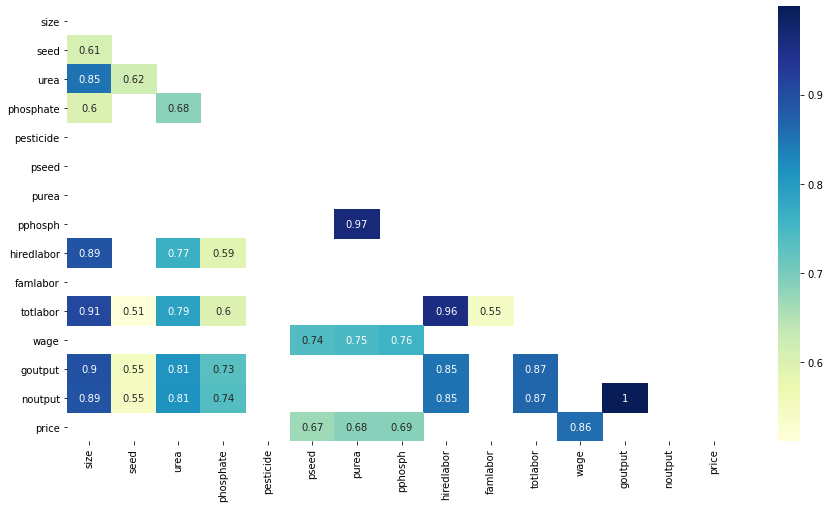

In [19]:
plot_corr(0.5, corr)

In [24]:
data['region_en'] = data['region'].replace({'gunungwangi':0,'ciwangi':1,'malausma':2,'langan':3,'sukaambit':4,'wargabinangun':5})

In [25]:
data['size_bn']= pd.cut(data['size'],bins = 10,labels = np.arange(10))
data['size_bn'] = data['size_bn'].astype('int')

In [27]:
# # Plot : 1 --> correlated cols and target (price)
# fig = px.parallel_coordinates(data[['region_en','size','wage','purea','pseed','pphosph']], color=data['price'])
# fig.show()

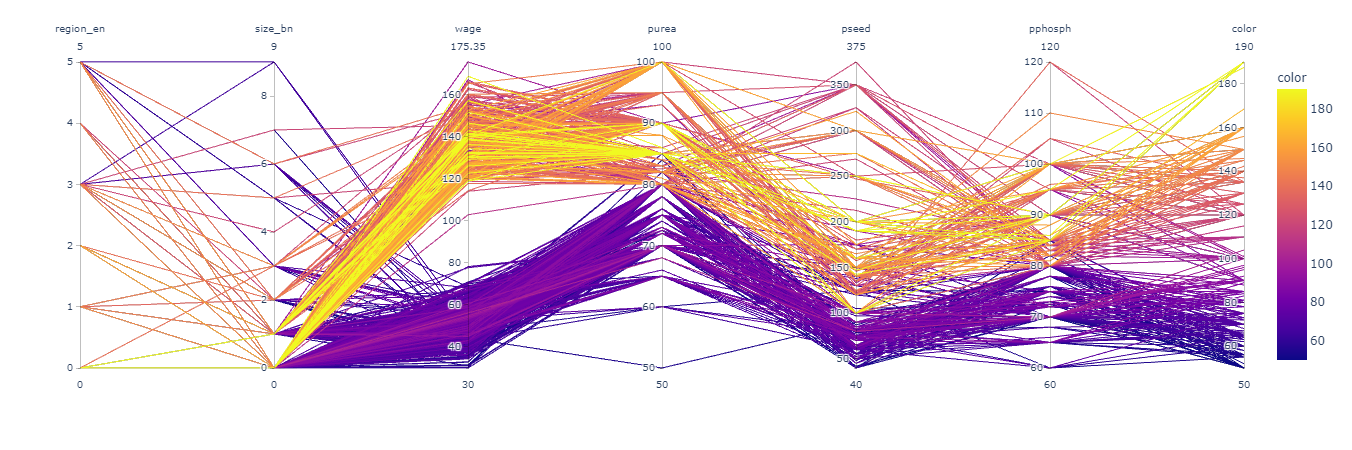

In [7]:
# Plot : 2 --> correlated cols & target (price) and binned size 

fig = px.parallel_coordinates(data[['region_en','size_bn','wage','purea','pseed','pphosph']], color=data['price'])
fig.show()

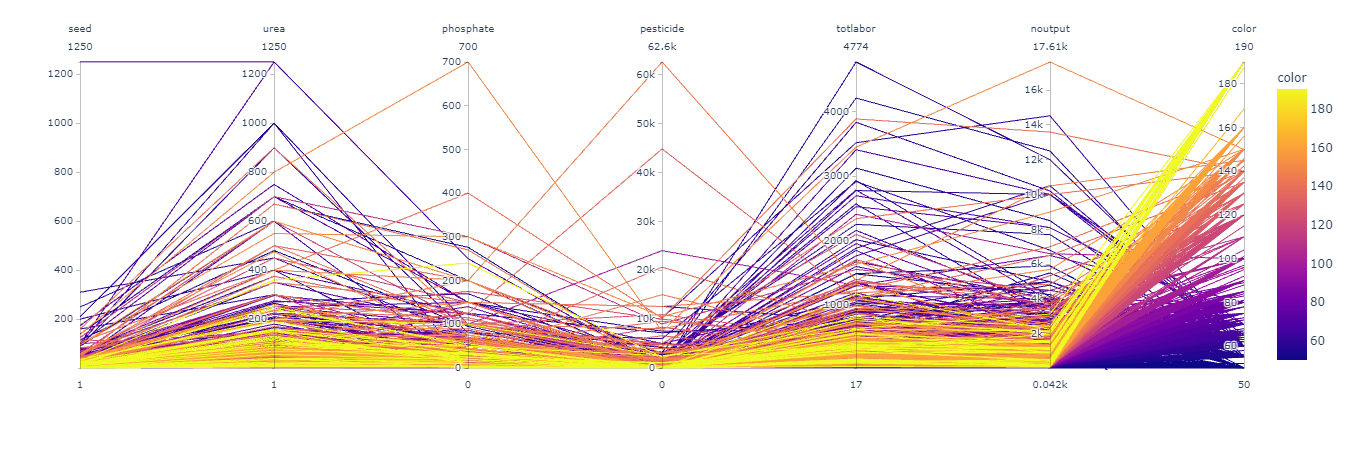

In [20]:
# plot : 3 non-correlated cols  
fig = px.parallel_coordinates(data[['seed','urea','phosphate','pesticide','totlabor','noutput']], color=data['price'])
fig.show()